In [1]:
import turicreate
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Read & Explore
Here I had read data and explored its columns to get better approach on them.

In [2]:
house_data = turicreate.SFrame("./home_data.sframe")
# Spliting data into train & test data for accuracy test
train_data, test_data = house_data.random_split(0.8, seed=0)

In [3]:
# Get three first items
house_data.head(3)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 3

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 | 538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 | 180000.0 |   2.0    |    1.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
+---------------+---------------+-----+
[3 rows x 21 columns]

# Required functionality
Now let's define needed functions in order to train our model.

In [4]:
def features_to_matrix(dataset, features, output):
    """
    Converts features and output columns to numpy arrays
    """
    #set a constant bias to dataset
    dataset["bias"] = 1
    features_list = ["bias"] + features
    feature_matrix = dataset[features_list]
    output_matrix = dataset[output]
    return feature_matrix.to_numpy(), output_matrix.to_numpy()

In [5]:
def predict(weights, feature_matrix):
    """
    weights is 1 * d matrix
    feature_matrix is n * d

    final result will be prediction matrix : 1 * n
    -> HW
    """
    return feature_mat @ weights.T

In [6]:
def get_rss_gradient(error, feature_mat):
    """
    Calculates gradient for rss vector
    -> -2H^T(Y - HW)
    """
    return -2 * feature_mat.T @ error

In [7]:
def gradient_descent(feature_matrix, output, init_weights, step_size, threshold):
    """
    Runs gradient descent on given data until the threshold 
    is satisfied.
    Threshold is the magnitude of gradient of RSS.
    """
    converged = False
    weights = np.array(init_weights)

    iteration = 0
    while not converged:
        predictions = predict(weights, feature_matrix)
        errors = output - predictions
        rss_grad = get_rss_gradient(errors, feature_matrix)
        weights -= step_size * rss_grad
        
        iteration += 1
        grad_magnitude = np.sqrt((rss_grad ** 2).sum())
        if grad_magnitude < threshold:
            converged = True

    return weights

In [8]:
features_m1 = ["sqft_living"]
output_m1 = "price"
feature_mat, output_mat = features_to_matrix(train_data, features_m1, output_m1)
init_weights = np.array([-47000., 1.])
step_size = 7e-12
threshold = 2.5e7
weights_m1 = gradient_descent(feature_mat, output_mat, init_weights, step_size, threshold)
print("*****Final Weights******")
print(f"Intercept: {weights_m1[0]}\nSlope(sqft_living): {weights_m1[1]}")

*****Final Weights******
Intercept: -46999.887165545515
Slope(sqft_living): 281.91211911641625


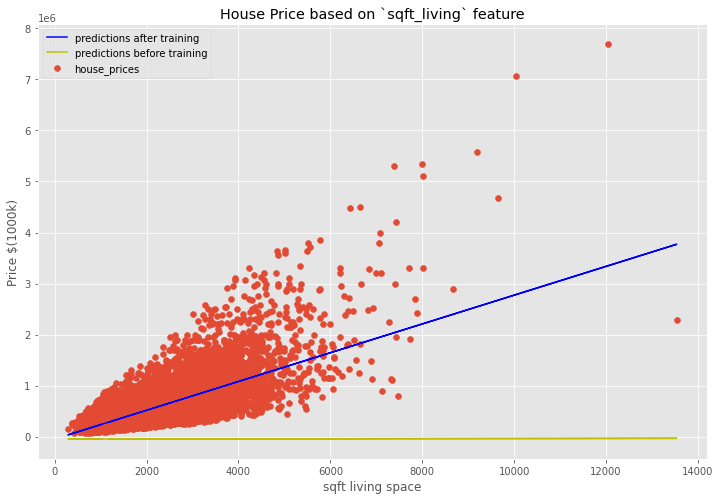

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("House Price based on `sqft_living` feature")
ax.set_xlabel("sqft living space")
ax.set_ylabel("Price $(1000k)")

ax.scatter(feature_mat[:,1], output_mat, label="house_prices")
predictions = predict(weights_m1, feature_mat)
init = predict(init_weights, feature_mat)
ax.plot(feature_mat[:,1], predictions, color="b", label="predictions after training")
ax.plot(feature_mat[:,1], init, color="y", label="predictions before training")
ax.legend()
plt.show()

In [10]:
features_m2 = ["sqft_living", "sqft_living15"]
output_m2 = "price"
feature_mat, output_mat = features_to_matrix(train_data, features_m2, output_m2)
init_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
threshold = 1e9
weights_m2 = gradient_descent(feature_mat, output_mat, init_weights, step_size, threshold)
print("*****Final Weights******")
print(f"Intercept: {weights_m2[0]}")
print(f"sqft_living: {weights_m2[1]}")
print(f"sqft_living15: {weights_m2[2]}")

*****Final Weights******
Intercept: -99999.96884886503
sqft_living: 245.07260254240242
sqft_living15: 65.27952766842058


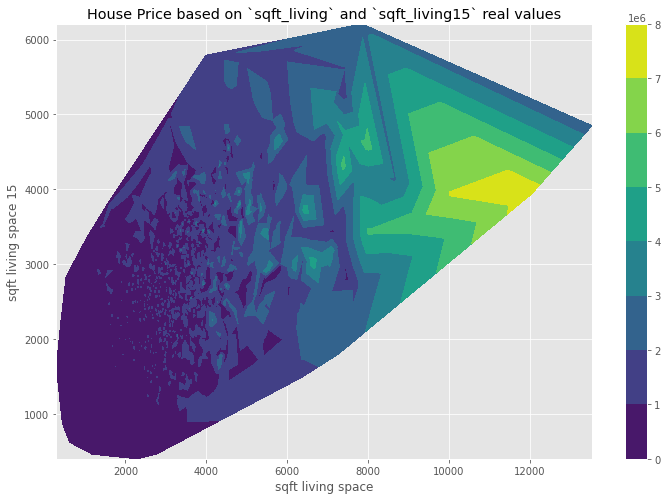

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("House Price based on `sqft_living` and `sqft_living15` real values")
ax.set_xlabel("sqft living space")
ax.set_ylabel("sqft living space 15")
sqft_living = feature_mat[:, 1]
sqft_living15 = feature_mat[:, 2]
price = output_mat
data = ax.tricontourf(sqft_living, sqft_living15, price)
fig.colorbar(data)
plt.show()

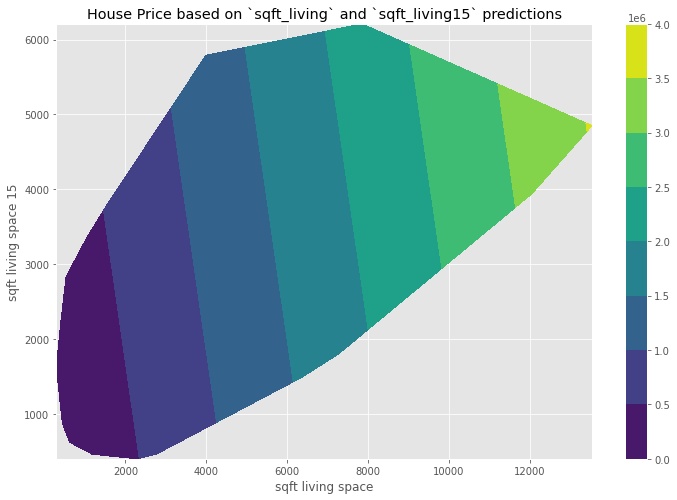

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("House Price based on `sqft_living` and `sqft_living15` predictions")
ax.set_xlabel("sqft living space")
ax.set_ylabel("sqft living space 15")
sqft_living = feature_mat[:, 1]
sqft_living15 = feature_mat[:, 2]
price = predict(weights_m2, feature_mat)
data = ax.tricontourf(sqft_living, sqft_living15, price)
fig.colorbar(data)
plt.show()

# Test Data
Here I will test RSS on both models to find out which model performs better on test data.

In [13]:
def get_model_rss(predictions, output):
    """
    Returns the RSS based on predictions and output given
    to the function
    """
    return ((predictions - output) ** 2).sum()

In [14]:
# model1
feature_mat, output_mat = features_to_matrix(test_data, features_m1, output_m1)
predictions_m1 = predict(weights_m1, feature_mat)
rss_m1 = get_model_rss(predictions_m1, output_mat)
print("RSS for M1: ", rss_m1)

RSS for M1:  275400047593155.94


In [15]:
# model 2
feature_mat, output_mat = features_to_matrix(test_data, features_m2, output_m2)
predictions_m2 = predict(weights_m2, feature_mat)
rss_m2 = get_model_rss(predictions_m2, output_mat)
print("RSS for M2: ", rss_m2)

RSS for M2:  270263446465244.06


In [16]:
min(rss_m1, rss_m2)

270263446465244.06